# This notebook is derived from [this](https://www.dataquest.io/blog/jupyter-notebook-tutorial/) tutorial blog post. 

In [23]:
print('Hello World')

Hello World


In [2]:
import time 
time.sleep(3)

In [3]:
def say_hello(recipient):
    return 'Hello, {}!'.format(recipient)

say_hello("Tim")

'Hello, Tim!'

# This is a level 1 heading

## This is a level 2 heading

This is some plain text that forms a paragraph. Add emphasis via **bold** and __bold__, or *italic* and _italic_. 

Paragraphs must be separated by an empty line. 

* Sometimes we want to include lists. 
* Which can be bulleted using asterisks. 

1. Lists can also be numbered. 
2. If we want an ordered list.

[It is possible to include hyperlinks](https://www.example.com)

Inline code uses single backticks: foo(), and code blocks use triple backticks: 
```
bar()
``` 
Or can be indented by 4 spaces: 

    foo()

And finally, adding images is easy: ![Alt text](https://www.example.com/image.jpg)

In [4]:
import numpy as np 
def square(x):
    return x*x

In [5]:
x = np.random.randint(1, 10)
y = square(x) 
print('%d squared is %d' % (x,y))

4 squared is 16


In [6]:
y = 10
print('Is %d squared %d?' % (x, y))

Is 4 squared 10?


In [7]:
%matplotlib inline 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
sns.set(style="darkgrid")

In [8]:
df = pd.read_csv('fortune500.csv')

In [9]:
df.head()
df.tail()
df.columns = ['year', 'rank', 'company', 'revenue', 'profit']

In [10]:
len(df)

25500

In [11]:
df.dtypes

year         int64
rank         int64
company     object
revenue    float64
profit      object
dtype: object

In [12]:
non_numeric_profits = df.profit.str.contains('[^0-9.-]')
df.loc[non_numeric_profits].head

<bound method NDFrame.head of        year  rank                company  revenue profit
228    1955   229                 Norton    135.0   N.A.
290    1955   291        Schlitz Brewing    100.0   N.A.
294    1955   295  Pacific Vegetable Oil     97.9   N.A.
296    1955   297     Liebmann Breweries     96.0   N.A.
352    1955   353     Minneapolis-Moline     77.4   N.A.
...     ...   ...                    ...      ...    ...
24242  2003   243    Farmland Industries   7580.2   N.A.
24296  2003   297           Land O'Lakes   5847.0   N.A.
24435  2003   436               Roundy's   3637.9   N.A.
24489  2003   490           Ace Hardware   3029.0   N.A.
25485  2005   486          Host Marriott   3773.0   N.A.

[369 rows x 5 columns]>

In [13]:
set(df.profit[non_numeric_profits])

{'N.A.'}

In [14]:
len(df.profit[non_numeric_profits])

369

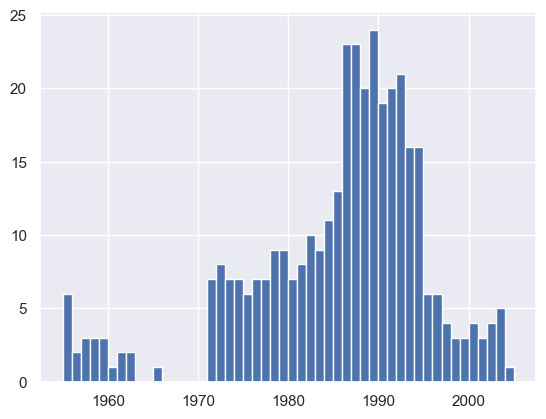

In [15]:
bin_sizes, _, _ = plt.hist(df.year[non_numeric_profits], bins = range(1955, 2006))

In [16]:
df = df.loc[~non_numeric_profits]
df.profit = df.profit.apply(pd.to_numeric)

In [17]:
len(df)

25131

In [18]:
df.dtypes

year         int64
rank         int64
company     object
revenue    float64
profit     float64
dtype: object

In [19]:
group_by_year = df.loc[:, ['year', 'revenue', 'profit']].groupby('year')
avgs = group_by_year.mean()
x = avgs.index
y1 = avgs.profit
def plot(x, y, ax, title, y_label):
    ax.set_title(title)
    ax.set_ylabel(y_label)
    ax.plot(x, y)
    ax.margins(x=0, y=0)

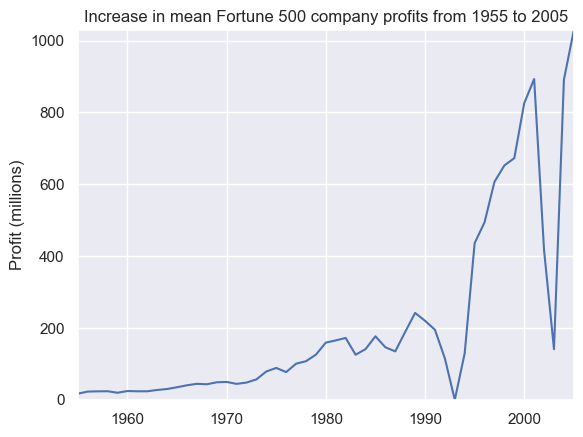

In [20]:
fig, ax = plt.subplots()
plot(x, y1, ax, 'Increase in mean Fortune 500 company profits from 1955 to 2005', 'Profit (millions)')

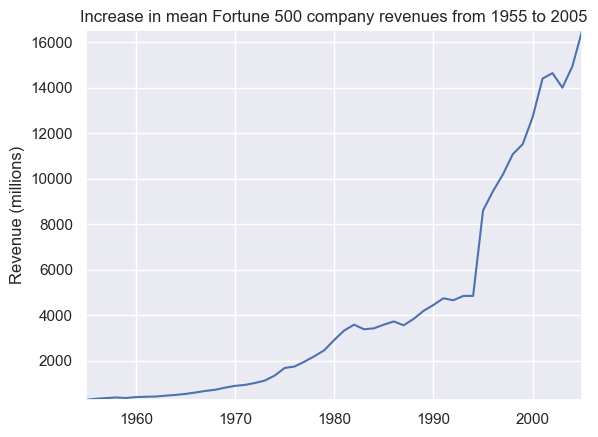

In [21]:
y2 = avgs.revenue
fig, ax = plt.subplots()
plot(x, y2, ax, 'Increase in mean Fortune 500 company revenues from 1955 to 2005', 'Revenue (millions)')

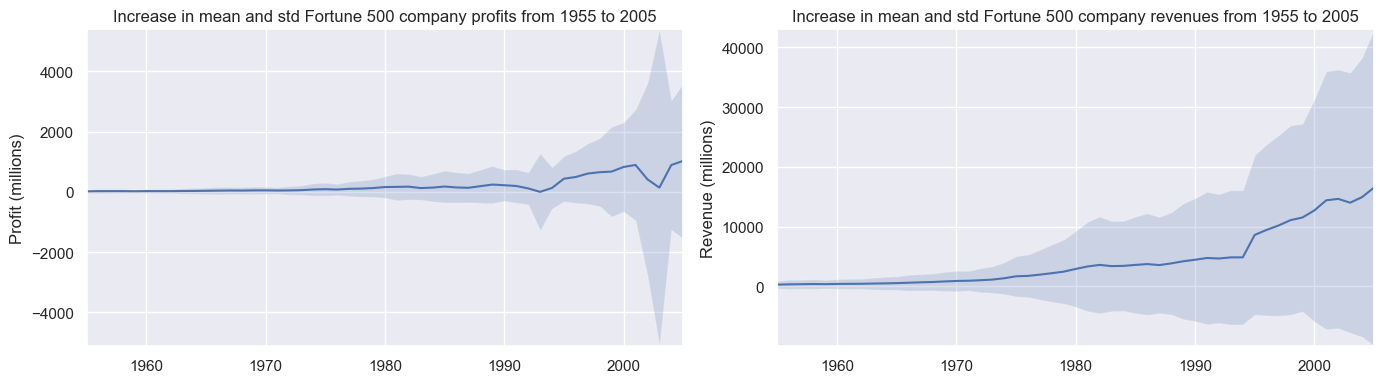

In [22]:
def plot_with_std(x, y, stds, ax, title, y_label):
    ax.fill_between(x, y - stds, y + stds, alpha=0.2)
    plot(x, y, ax, title, y_label)
fig, (ax1, ax2) = plt.subplots(ncols = 2) 
title = 'Increase in mean and std Fortune 500 company %s from 1955 to 2005'
stds1 = group_by_year.std().profit.values
stds2 = group_by_year.std().revenue.values
plot_with_std(x, y1.values, stds1, ax1, title % 'profits', 'Profit (millions)')
plot_with_std(x, y2.values, stds2, ax2, title % 'revenues', 'Revenue (millions)')
fig.set_size_inches(14, 4)
fig.tight_layout()